<a href="https://colab.research.google.com/github/andrewwgordon/keras-minst-handwriting/blob/main/Keras-Minst-Handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [69]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

#printing the shapes of the vectors
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


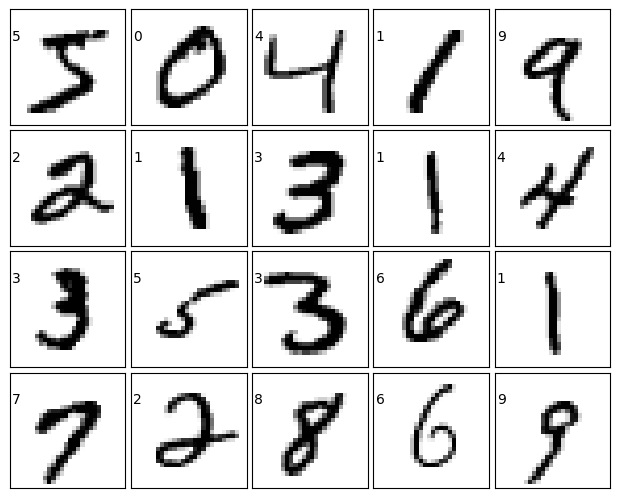

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(train_X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(train_y[i]))

In [71]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

ds_train = ds_train.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

In [72]:
ds_test = ds_test.map(
    normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

In [73]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10)
])
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

model_history = model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
469/469 [==============================] - 11s 11ms/step - loss: 0.3661 - sparse_categorical_accuracy: 0.9010 - val_loss: 0.1970 - val_sparse_categorical_accuracy: 0.9442
Epoch 2/6
469/469 [==============================] - 3s 6ms/step - loss: 0.1688 - sparse_categorical_accuracy: 0.9527 - val_loss: 0.1366 - val_sparse_categorical_accuracy: 0.9610
Epoch 3/6
469/469 [==============================] - 3s 7ms/step - loss: 0.1205 - sparse_categorical_accuracy: 0.9658 - val_loss: 0.1152 - val_sparse_categorical_accuracy: 0.9650
Epoch 4/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0919 - sparse_categorical_accuracy: 0.9733 - val_loss: 0.0990 - val_sparse_categorical_accuracy: 0.9708
Epoch 5/6
469/469 [==============================] - 3s 6ms/step - loss: 0.0738 - sparse_categorical_accuracy: 0.9790 - val_loss: 0.0846 - val_sparse_categorical_accuracy: 0.9746
Epoch 6/6
469/469 [==============================] - 3s 7ms/step - loss: 0.0612 - sparse_categorical_ac

In [74]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


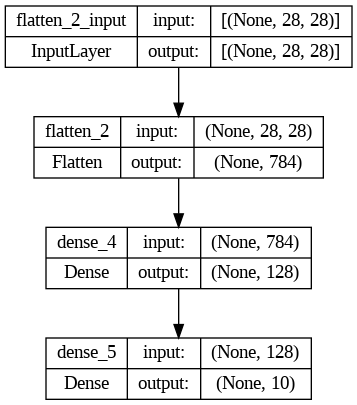

In [75]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [76]:
loss_and_metrics = model.evaluate(test_X, test_y, verbose=2)

313/313 - 1s - loss: 12.4086 - sparse_categorical_accuracy: 0.9737 - 645ms/epoch - 2ms/step


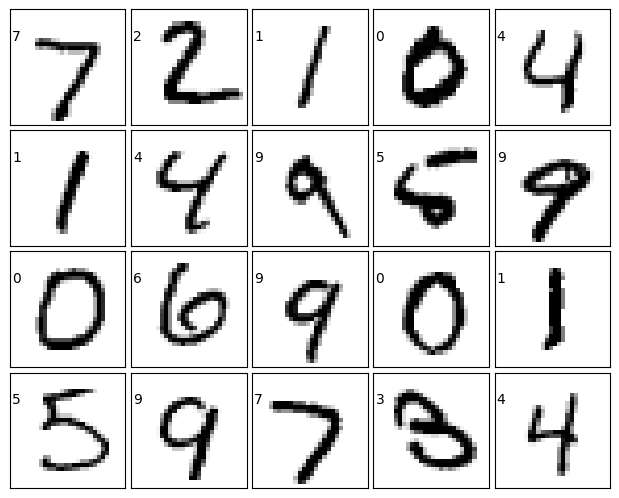

In [77]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(20):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(test_X[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(test_y[i]))

In [78]:
# Build a list of predictions for the whole test dataset
predictions = model.predict([test_X])

313/313 [==============================] - 1s 2ms/step


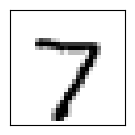

In [79]:
# Display the first image in the test series
# (Should be a number 7)
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
ax.imshow(test_X[0], cmap=plt.cm.binary, interpolation='nearest')

In [80]:
# Display the prediction of the first image in the test series
# (Should be the number 7)
np.argmax(predictions[0])

7